
# Project: Investigate a Dataset - [tmdb_movies]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis
1-What is the most popular genres of movie?                                                                                     
2-What are the characteristics of the most popular films?

In [14]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [15]:
# load the data 
sns .set_style('darkgrid')
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
#explore general properties
df.shape
df.info()
df.duplicated().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


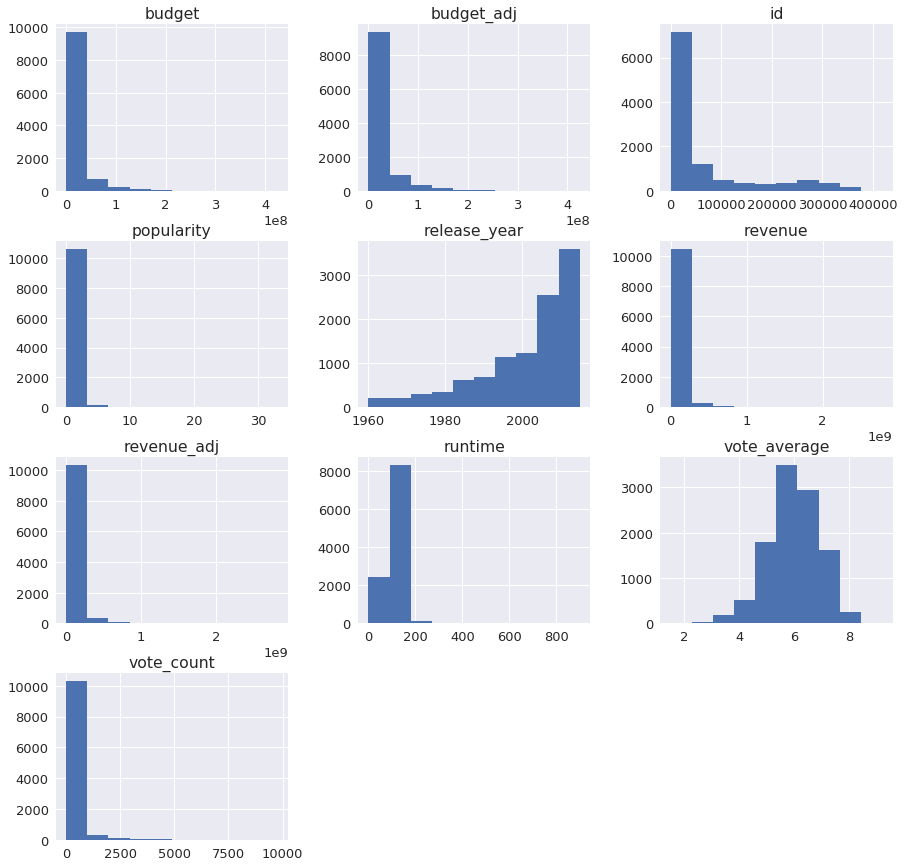

In [17]:
df.hist(figsize=(15,15));


### Data Cleaning
###### Removing extra coulmun :
we have 21 columns but our analysis not depend on all of them so we choose important coulms that helps us.
##### data cleaning(perform all the below steps for cleaning)
1- delet the duplicated row which we have in our data set                                                                               
2- drop (delet) unrelevent columns sush as 'imdb_id','homepage','tagline','director', 'cast', 'keywords', 'overview','release_date','production_companies'.                                                                                                                                                                                                                        
3- as per opservation ,there are alot of recaords that have 0 values in the runtime,budget_adj,revenue_adj coulmns , i drop them to calculate the correct profit values.                                                                                  
4- drop the NAN values in the genres column.

 

In [18]:
#remove duplicate,null and non necessary columns
df.drop_duplicates(inplace = True)
df.drop(['imdb_id','homepage','tagline','director', 'cast', 'keywords', 'overview','release_date','production_companies'], axis=1, inplace=True)
df.drop(df.query('runtime == 0 or budget_adj == 0 or revenue_adj == 0').index,axis=0, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 12 columns):
id                3854 non-null int64
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(4), int64(6), object(2)
memory usage: 391.4+ KB


In [19]:
df.dropna(inplace=True)
df.isnull().any()

id                False
popularity        False
budget            False
revenue           False
original_title    False
runtime           False
genres            False
vote_count        False
vote_average      False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [20]:
df.shape

(3854, 12)

<a id='eda'></a>
## Exploratory Data Analysis




### Research Question 1 (What is the most popular genres of movie?)

In [21]:
from itertools import chain

# Return list from series of '|'-separated strings
def box(x):
    return list(chain.from_iterable(x.str.split('|')))

# Calculate lengths of splits
lens = df['genres'].str.split('|').map(len)

# Create new dataframe, repeating or chaining as appropriate
df_genres = pd.DataFrame({'release_year': np.repeat(df['release_year'], lens),                       
                          'genres': box(df['genres']),
                          'original_title':np.repeat(df['original_title'],lens) 
                          ,'vote_average':np.repeat(df['vote_average'],lens)
                          ,'runtime': np.repeat(df['runtime'], lens),
                         'vote_count': np.repeat(df['vote_count'], lens),
                         'budget_adj': np.repeat(df['budget_adj'], lens),
                         'revenue_adj': np.repeat(df['revenue_adj'], lens)})
m=df_genres['genres'].unique()


Text(0.5,1,'The percentge of each genres')

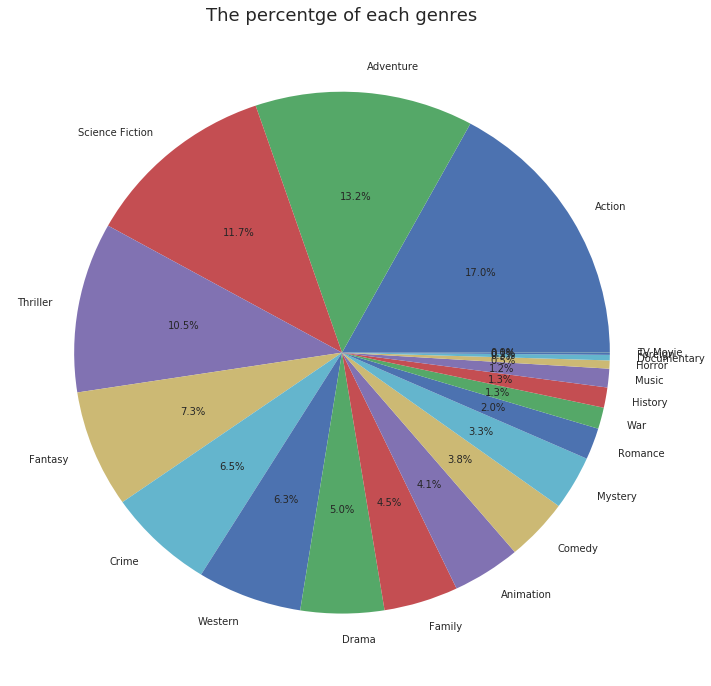

In [22]:
tag_counts = df_genres.genres.value_counts()
tag_counts['Drama']
sns.set(rc={'figure.figsize':(12,12)}, font_scale=1.5)
plt.subplots()
plt.pie(tag_counts, labels = m, textprops = {'fontsize': 10},autopct='%1.1f%%');
plt.title('The percentge of each genres')

from this plot we can know Action is the most popular genres then the one who follows is Adventure genres

### Research Question 2  (What are the characteristics of the most popular films?!)

In [23]:
is_action = df_genres.genres.str.contains('Action')
action=df_genres[is_action]
action.describe()

,release_year,vote_average,runtime,vote_count,budget_adj,revenue_adj
count,1085.000000,1085.000000,1085.000000,1085.000000,1.085000e+03,1.085000e+03
mean,2000.682028,6.036959,111.663594,804.656221,6.644262e+07,1.953879e+08
std,11.377184,0.795216,19.428984,1216.923089,5.538341e+07,2.711440e+08
min,1960.000000,2.200000,42.000000,10.000000,4.519285e+00,3.038360e+00
25%,1994.000000,5.600000,98.000000,98.000000,2.575740e+07,2.819535e+07
50%,2003.000000,6.100000,108.000000,299.000000,5.063933e+07,9.488289e+07
75%,2010.000000,6.500000,122.000000,961.000000,9.245751e+07,2.594654e+08
max,2015.000000,8.100000,219.000000,9767.000000,4.250000e+08,2.827124e+09


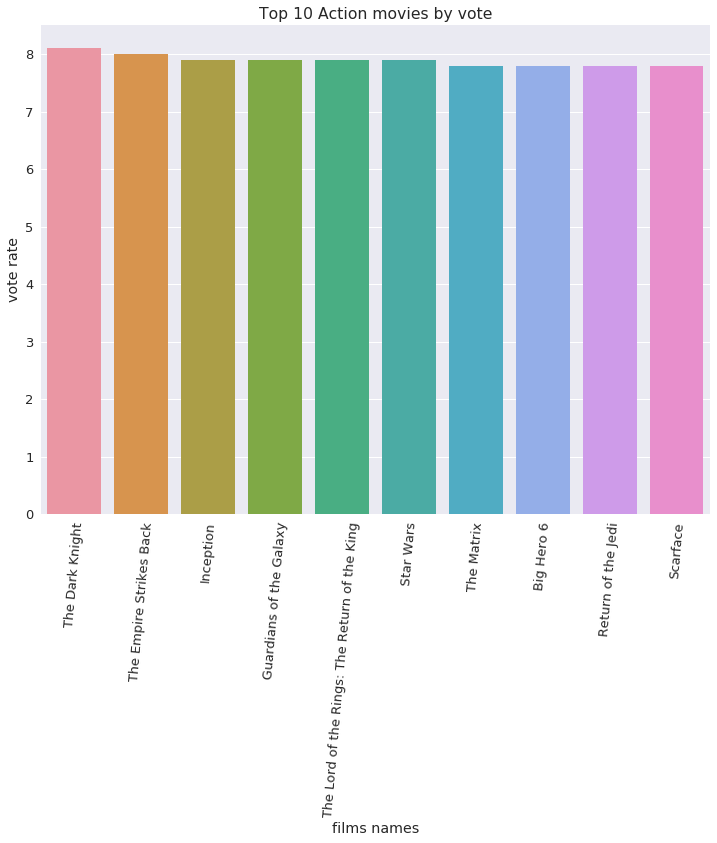

In [24]:
top=action.sort_values(by=['vote_average'], ascending=False)
top.head(10)
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)
shap=sns.barplot(top.head(10).original_title,top.head(10).vote_average);
for item in shap.get_xticklabels():
    item.set_rotation(85)

shap.set(xlabel='films names', ylabel='vote rate', title = 'Top 10 Action movies by vote')
plt.show()

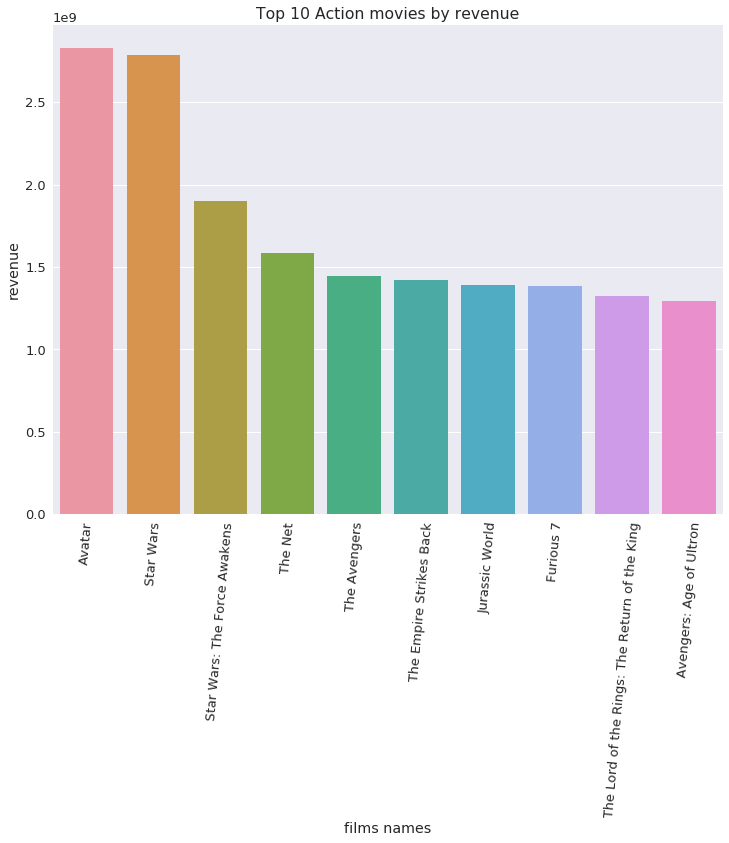

In [25]:
best=action.sort_values(by=['revenue_adj'], ascending=False)
best.head(10)
sns.set(rc={'figure.figsize':(12,9)}, font_scale=1.3)
shap1=sns.barplot(best.head(10).original_title,best.head(10).revenue_adj);
for item in shap1.get_xticklabels():
    item.set_rotation(85)

shap1.set(xlabel='films names', ylabel='revenue', title = 'Top 10 Action movies by revenue')
          
plt.show()

Using these graphs, we can conclude that(The Empire Strikes Back, The Lord of the Rings: The Return of the King, Star Wars) films are better than others, as they got high revenue and high vote average.

<a id='conclusions'></a>
## Conclusions

By analyzing this data, we concluded that action films have the largest share, and that 75% of films were produced after 2010, where the average rating is (6.036959).
And it is possible to increase the analysis so that we can know what kind of films can outperform action films in the coming years
## Limitations
The revenue and budget columns contain zero values, and this makes the calculation of the values inaccurate, and when they are deleted , the number of data rows decreases dramatically.

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0